In [ ]:
pip install pandas mlxtend

In [5]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules

# Load the JSON data
file_path = '../flutter_30-issues.json'  # Update the file path as needed
issues_data = pd.read_json(file_path)

# Extract labels from each issue into a list of transactions
transactions = []
for _, row in issues_data.iterrows():
    labels = [label['name'] for label in row['labels']] if 'labels' in row and row['labels'] is not None else []
    if labels:
        transactions.append(labels)

# One-hot encode the transactions
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply FP-Growth algorithm to find frequent itemsets
frequent_itemsets = fpgrowth(df, min_support=0.05, use_colnames=True)  # Adjust min_support as necessary

# Save frequent itemsets to CSV
frequent_itemsets.to_csv('frequent_itemsets.csv', index=False)

# Optionally, find association rules and save them
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)  # Adjust confidence threshold
rules.to_csv('association_rules.csv', index=False)

print("Frequent itemsets and association rules have been saved to CSV files.")


Frequent itemsets and association rules have been saved to CSV files.


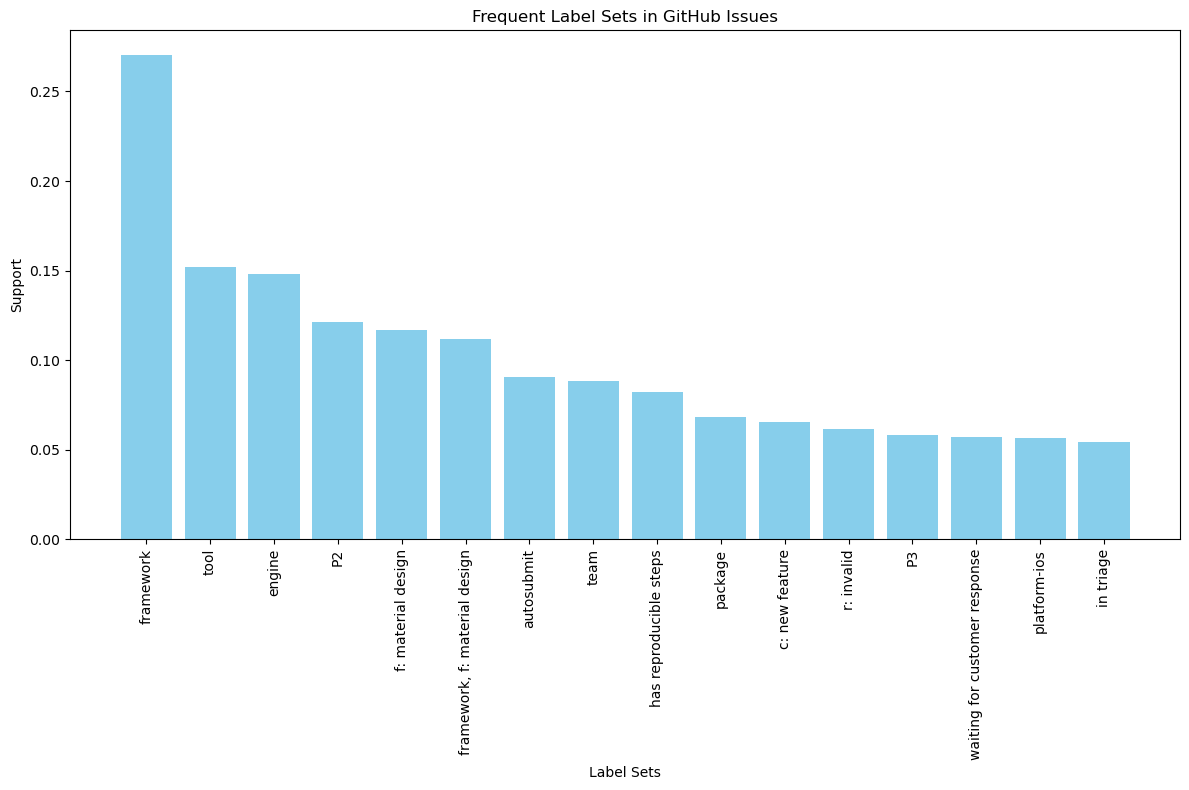

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth

# Load the JSON data
file_path = '../flutter_all_issues.json'  # Ensure this is the correct path to your file
issues_data = pd.read_json(file_path)

# Extract labels from each issue into a list of transactions
transactions = []
for _, row in issues_data.iterrows():
    labels = [label['name'] for label in row['labels']] if 'labels' in row and row['labels'] is not None else []
    if labels:
        transactions.append(labels)

# One-hot encode the transactions
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply FP-Growth algorithm to find frequent itemsets
frequent_itemsets = fpgrowth(df, min_support=0.05, use_colnames=True)  # Adjust min_support as necessary

# Plotting the frequent itemsets
frequent_itemsets['itemsets'] = frequent_itemsets['itemsets'].apply(lambda x: ', '.join(list(x)))
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)  # Sort by support

plt.figure(figsize=(12, 8))
plt.bar(frequent_itemsets['itemsets'], frequent_itemsets['support'], color='skyblue')
plt.xlabel('Label Sets')
plt.ylabel('Support')
plt.title('Frequent Label Sets in GitHub Issues')
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.tight_layout()
plt.show()
